<h1>Project (Google Play Store)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Missing-or-Incorrect-Values" data-toc-modified-id="Missing-or-Incorrect-Values"><span class="toc-item-num">&nbsp;&nbsp;</span>Missing or Incorrect Values</a></span></li></ul></li><li><span><a href="#Observations" data-toc-modified-id="Observations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Statistics</a></span></li></ul></div>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind, ttest_1samp, norm, t, mode
import os
import re

my_colors = ['royalblue','seagreen','y', 'salmon','blueviolet','orangered' ,
                 'olive','deeppink', 'purple', 'gold', 'cyan' ]

In [242]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'README.md',
 'Untitled.ipynb',
 'Week5-6_Google_Player_Store.ipynb']

# Project Description

##### Motivation Behind The Project
   The goal of this project is to do a relatively simple, yet comprehensive analysis of the Android app market via comparing 10,000 apps in Google Play across different categories. As the result, this straightforward and common-sense analysis should give a broad picture of what the situation in Android app market looks like. Those findings in turn might provide some insights for people who are involved in market research or intersted in knowing what strategies to follow in order to launch and sustain a successful app in Android market.

##### Dataset Description
Original dataset contains the following files:
<ul> <li>googleplaystore.csv: Contains essential data about types and characteristics of applications listed in Google Play.</li>
<li>googleplaystore_user_reviews.csv: This is a pre-processed dataset that has been additionally equipped (based on actual reviews) with sentiment-related information about apps</li>
</ul>

In [243]:
df=pd.read_csv('data/googleplaystore.csv')

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Clean Data

In [245]:
playstore = df #copy dataframe in applications
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [246]:
playstore[playstore['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


### Missing or Incorrect Values

In [247]:
"""
Change Type to Free for the Apps with Type=O
"""
playstore.Type.value_counts()
playstore['Type']=applications.Type.replace(['0'],'Free')
playstore.Type.value_counts()

Free    8354
Paid     718
Name: Type, dtype: int64

In [248]:
"""
Remove rows with Category '1.9'
"""
playstore.Category.value_counts()
#df=df[df.Category != '1.9']
playstore.drop(playstore[playstore.Category == '1.9'].index,inplace=True)
playstore.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [249]:
playstore['Android Ver'].value_counts()
playstore['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
6.29.37589               1
24.8.1                   1
250                      1
9.2.0                    1
2.137                    1
Name: Current Ver, Length: 2831, dtype: int64

In [250]:
#df[['Android version','col1','col2']] = df['Android Ver'].str.split(" ",expand=True)
#df
"""
Change Android Verion to the version format
"""
def version_parser(v):
    x = re.findall(r'([\d.]+)', v)
    if x :
        return x[-1]
    return v

playstore['Android Ver'] = playstore['Android Ver'].map(version_parser, na_action='ignore')
playstore['Android Ver'].fillna('unknown', inplace=True)

In [287]:
playstore['Android Ver'].value_counts()

4.1                   2244
4.0.3                 1395
4.0                   1313
4.4                    845
2.3                    625
5.0                    508
4.2                    364
2.3.3                  274
3.0                    237
2.2                    236
4.3                    221
2.1                    133
1.6                    116
6.0                     55
7.0                     40
3.2                     36
2.0                     31
5.1                     21
1.5                     19
Varies with device      13
3.1                     10
8.0                      8
2.0.1                    7
7.1.1                    6
7.1                      2
1.0                      2
unknown                  2
Name: Android Ver, dtype: int64

In [252]:
#df=df.drop(columns=['Android Ver','col1','col2'])

In [253]:
#df['Android version']=df['Android version'].replace(['4.4W'],'4.4')

In [254]:
#df['Android version'].value_counts()

In [255]:
"""
App with the largest number of installs, and I removed +
Change column type to int
"""
playstore['Installs'] = playstore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [256]:
playstore['Installs'] = playstore['Installs'].astype(int)

In [257]:
playstore.isin(['Varies with device']).any()

App               False
Category          False
Rating            False
Reviews           False
Size               True
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [258]:
"""
Remove Apps with unknown size and current ver
"""
#df=df[(df.Size != 'Varies with device') & (df['Current Ver'] != 'Varies with device' )]
playstore.drop(playstore[(playstore.Size == 'Varies with device') | 
                               (playstore['Current Ver'] == 'Varies with device' )].index,inplace=True)

In [259]:
playstore.isin(['Varies with device']).any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver        True
dtype: bool

In [260]:
"""
Size of applications
"""
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace('+',''))

In [290]:
playstore.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [292]:
playstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7356.0,4.170024e+00,5.508612e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,8763.0,2.339918e+05,1.607591e+06,0.0,20.0,627.0,21917.5,4.489389e+07
Size,8763.0,2.123160e+07,2.252705e+07,8500.0,4700000.0,13000000.0,29000000.0,1.000000e+08
Installs,8763.0,6.355854e+06,4.166327e+07,0.0,1000.0,50000.0,1000000.0,1.000000e+09
Price,8763.0,1.180692e+00,1.768775e+01,0.0,0.0,0.0,0.0,4.000000e+02


#### So, I cleaned the data and dropped around 1000 rows which contained 'Varies with device' in Size and Current Ver. I am not sure if it is necessary for our research. Please check.

#### for Rating column we have 1416 nan, remove them or raplace with mean of Ratings????

In [263]:
playstore[playstore.Rating.isna()]

t_data=playstore[pd.notnull(playstore['Rating'])]
# mean,median,mode
rt_mean=np.mean(t_data['Rating'])
rt_median=np.median(t_data['Rating'])
rt_mode=mode(t_data['Rating'])

print(rt_mean,rt_median,rt_mode)
# rating is right skewed so take median in place of nan
#playstore['Rating'].fillna(median,inplace=True)

4.172544409613379 4.3 ModeResult(mode=array([4.4]), count=array([828]))


#### We have also 309 rows, so we wiil remove them

In [268]:
playstore.duplicated().sum()
(playstore.duplicated().value_counts()/playstore.shape[0])*100

False    96.593915
True      3.406085
dtype: float64

In [269]:
playstore.drop_duplicates(inplace=True) 


In [271]:
playstore.info()

In [276]:
# converting review to int
playstore['Reviews']=playstore['Reviews'].astype('int')

In [275]:
"""
Change Last Updated to datetime format
"""
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

In [278]:
# converting size
playstore['Size']=playstore['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [280]:
playstore['Size'].value_counts()

11000000.0    184
13000000.0    183
12000000.0    182
14000000.0    181
15000000.0    168
             ... 
940000.0        1
544000.0        1
429000.0        1
97000.0         1
811000.0        1
Name: Size, Length: 458, dtype: int64

In [281]:
playstore['Price'].value_counts()
#data['Price']=data['Price'].str.replace('$','').astype('float')

0.00     8078
0.99      142
2.99      111
1.99       66
4.99       59
         ... 
1.59        1
46.99       1
1.61        1
28.99       1
1.04        1
Name: Price, Length: 87, dtype: int64

# Observations

##### Overview and Questions¶
<ol>
<li>What kind of apps have the highest market share?</li>
<li>Is there any specific category (ex: Health, Games, Entertainment) dominating the market?</li>
<li>Which categories have the fewest the number of apps available?</li>
<li>What is the average rating accross all apps in the Google Play market?</li>
<li>Does the size of an app affect its rating?</li>
<li>Do users really care about system-heavy apps at all or they only prefer having light-weight apps?</li>
<li>Does the price of an app affect its rating?</li>
<li>Do users always prefer free apps over paid apps?</li>
</ol>

In [ ]:
mode=playstore.Price.mode()[0]

In [ ]:
mode 

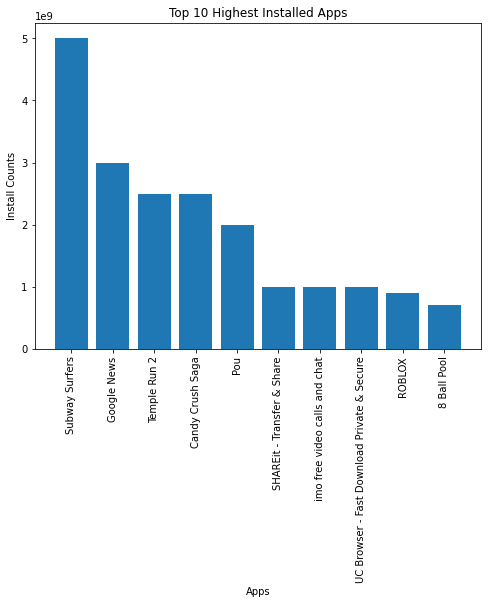

In [297]:
App_installed = playstore.groupby('App')['Installs'].sum().reset_index()
final_result = App_installed.sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize=(8,6))
plt.bar('App','Installs', data=final_result)
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Highest Installed Apps")
plt.show()

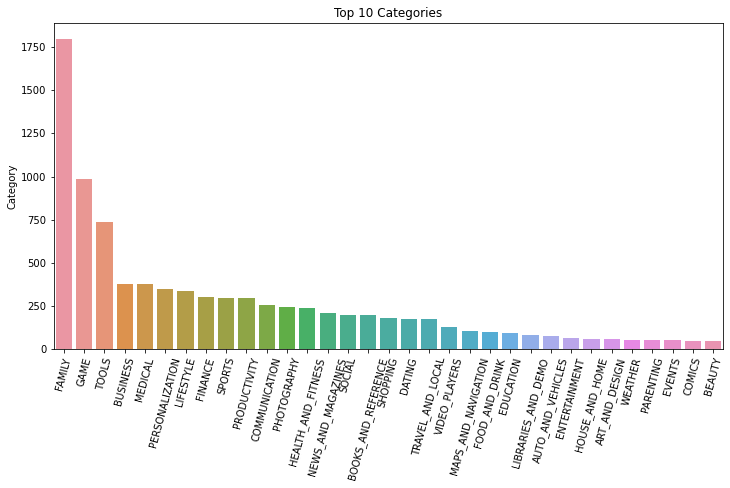

In [295]:
top_categories = playstore.Category.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 Categories')
sns.set_color_codes("pastel")
sns.barplot(top_categories.index, top_categories)

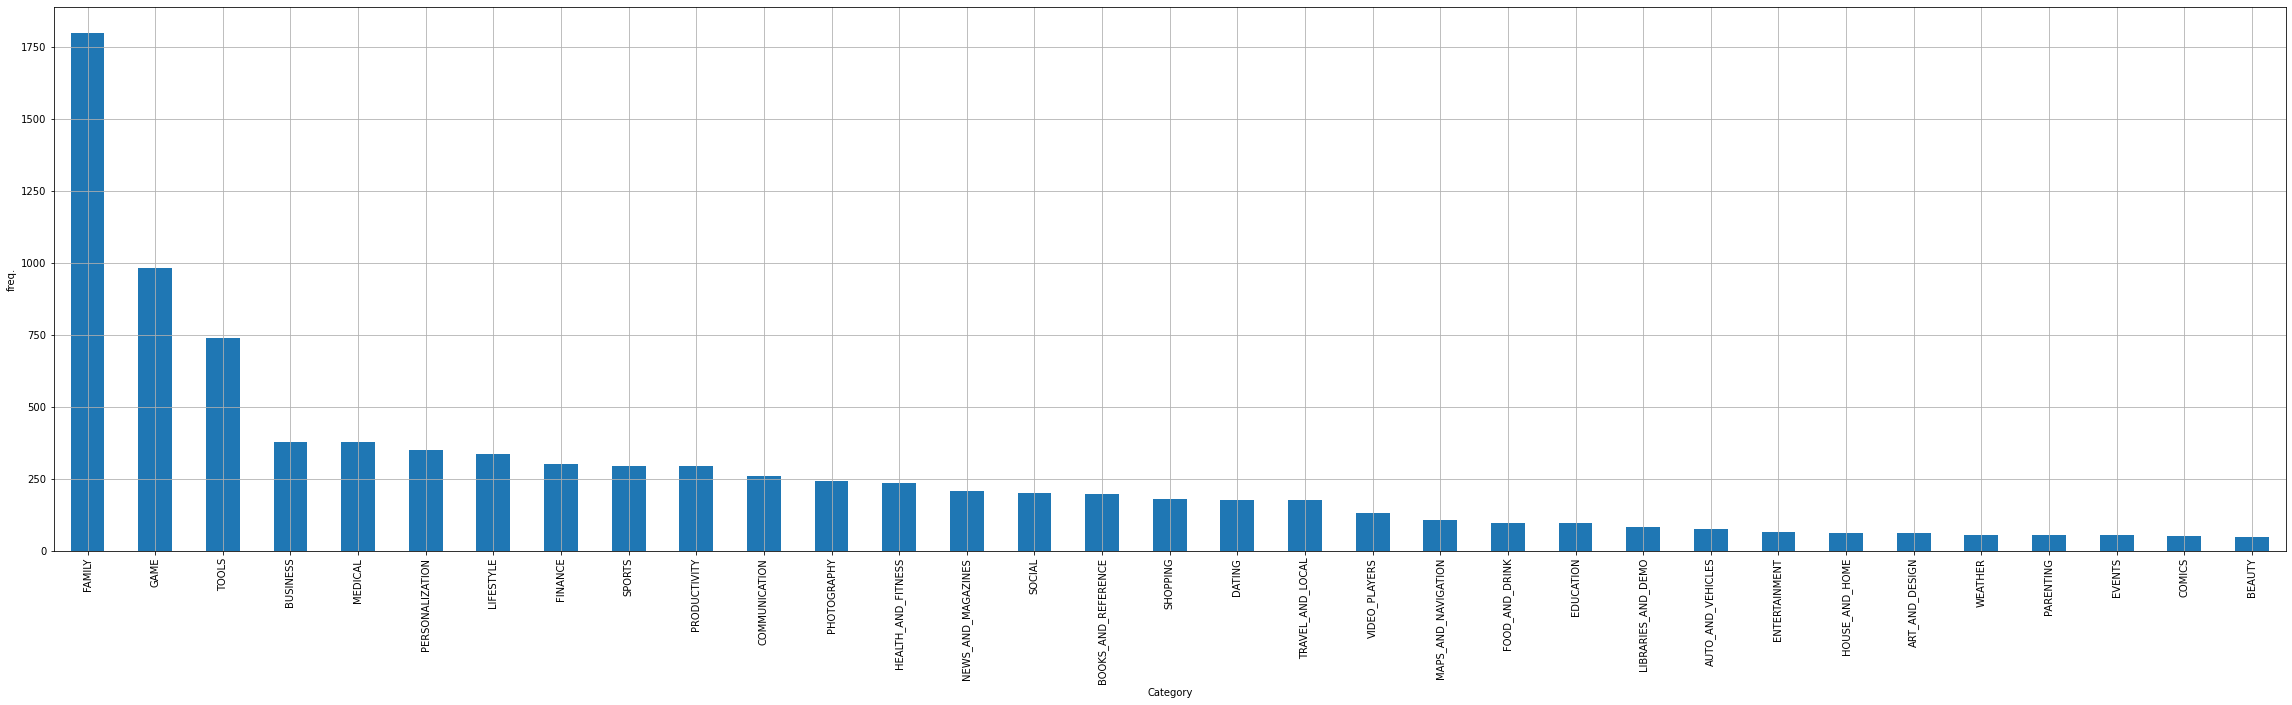

In [298]:
plt.figure(figsize=(40,10))
playstore['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

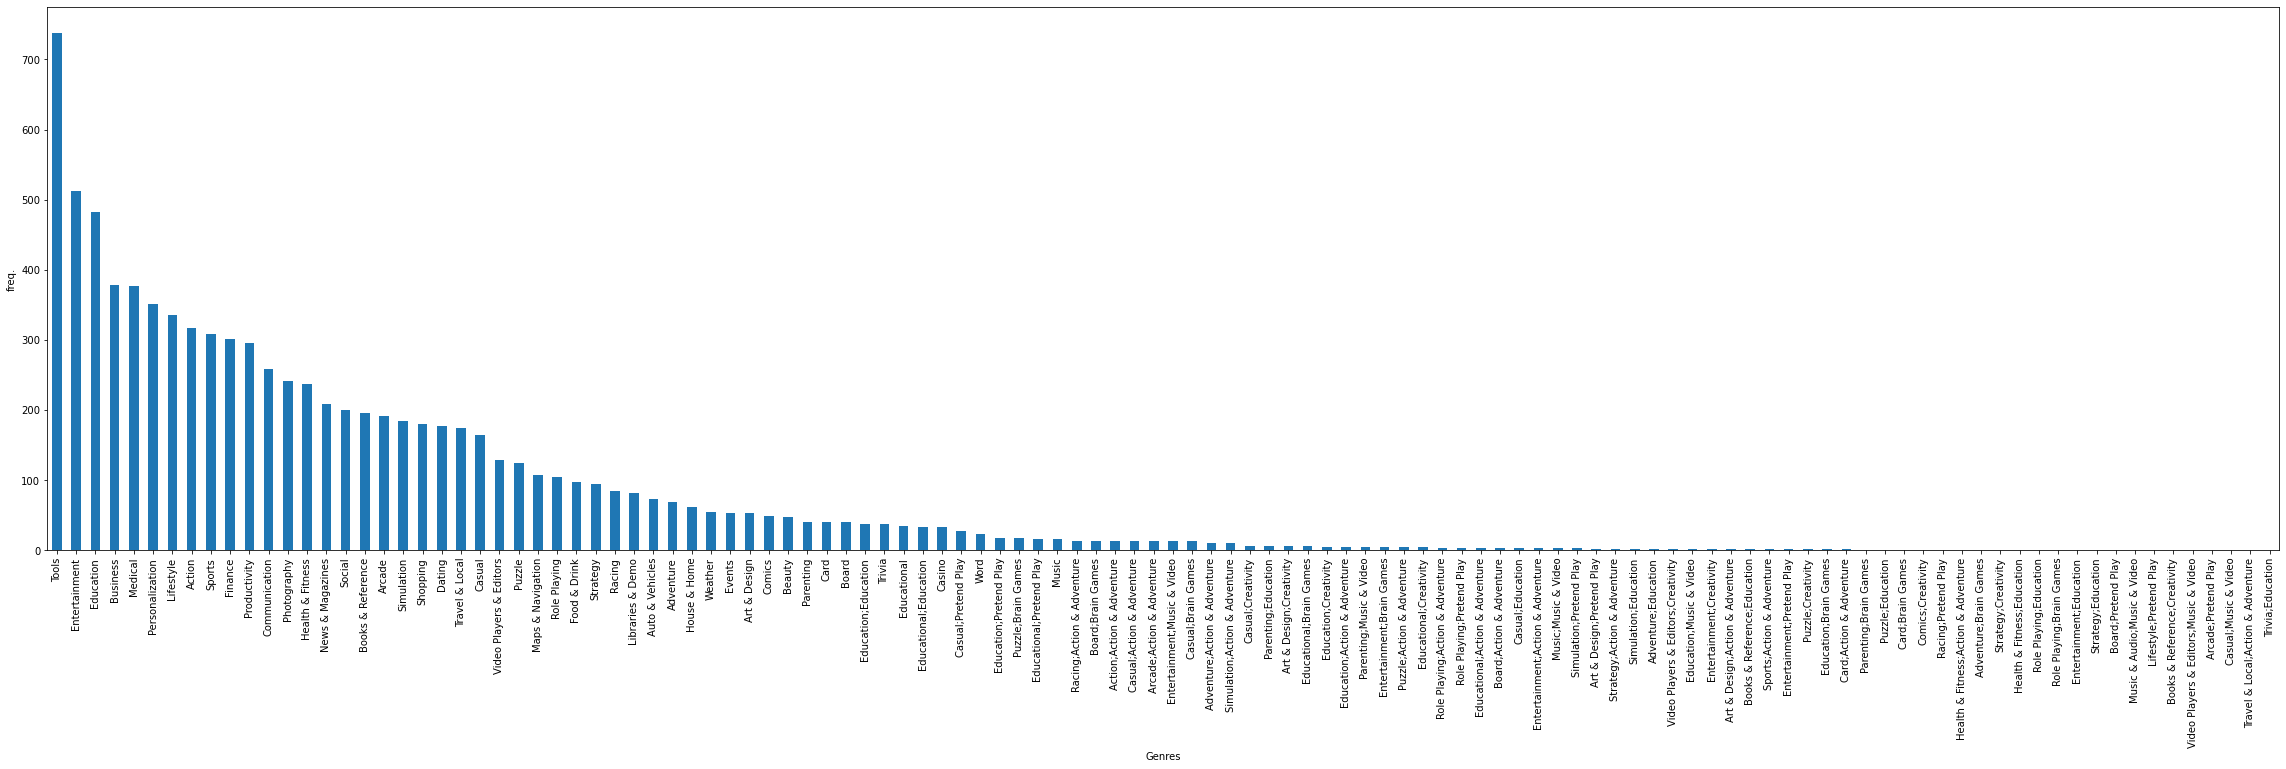

In [300]:
plt.figure(figsize=(40,10))
playstore['Genres'].value_counts().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.show()

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

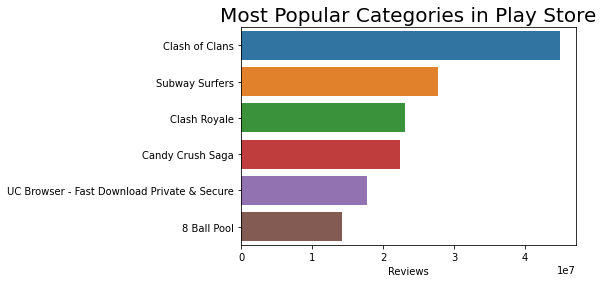

In [301]:
sorte = playstore.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = sorte )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

# I was trying to color the top 3 in different color but I couldn't manage

In [1]:
top_categories = playstore.Category.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 Categories')

plt.bar(top_categories[:3].index, top_categories[:3], color=my_colors[5])
plt.bar(top_categories[3:].index, top_categories[3:], color=my_colors[0])

NameError: name 'playstore' is not defined

In [ ]:
"""fig = px.histogram(top_categories, playstore.Rating, marginal='box')
fig.update_layout(title_text='Distribution of Ratings Across All Apps in The Top 10 Categories', title_font_size=16)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()"""
top3_categories = playstore.Category.value_counts().head(3)
top3_categories
playstore[playstore.Category == top3_categories.index[0]]['Rating'].max()

In [ ]:
x1 = playstore[playstore.Category == top3_categories.index[0]]['Rating'].values
x2 = playstore[playstore.Category == top3_categories.index[1]]['Rating'].values
x3 = playstore[playstore.Category == top3_categories.index[2]]['Rating'].values

kwargs = dict(bins=100)

plt.figure(figsize=(12,6))
plt.hist(x1, **kwargs, color='g', label=top3_categories.index[0])
plt.hist(x2, **kwargs, color='b', label=top3_categories.index[1])
plt.hist(x3, **kwargs, color='r', label=top3_categories.index[2])
plt.grid()
plt.gca().set(title=' Histogram of Ratings for Top3 category', ylabel='Frequency')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

sns.distplot( x1 , color="blue", label=top3_categories.index[0])
#sns.distplot( x2 , color="red", label=top3_categories.index[1])
#sns.distplot( x3 , color="green", label=top3_categories.index[2])
plt.legend()
plt.grid()

#plt.xlim(50,75)
plt.show()

In [ ]:
def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

In [ ]:
data_filter = playstore[['Rating', 'Type', 'Category']]
"""
Rating Distribution based on Free and Paid Apps
"""
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
df2=playstore[['Installs','Price']].copy()
Heatmap1= sns.heatmap(df2.corr())

In [ ]:
df3=playstore[['Price','Rating']].copy()
Heatmap2 = sns.heatmap(df3.corr())